# **Imports**

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [141]:
random_state = 1000
df = pd.read_csv("SpotifyDataLarge.csv")

# **Preprocessing**

In [142]:
df.isna().sum()  # Checking for null values
df = df.dropna()

In [ ]:
#df.info() # Checking value types. Everything is int or float.

In [144]:
df.drop('isrc', axis=1, inplace=True)
df.drop('updated_on', axis=1, inplace=True)

**Plotting the correlation map**

<Axes: >

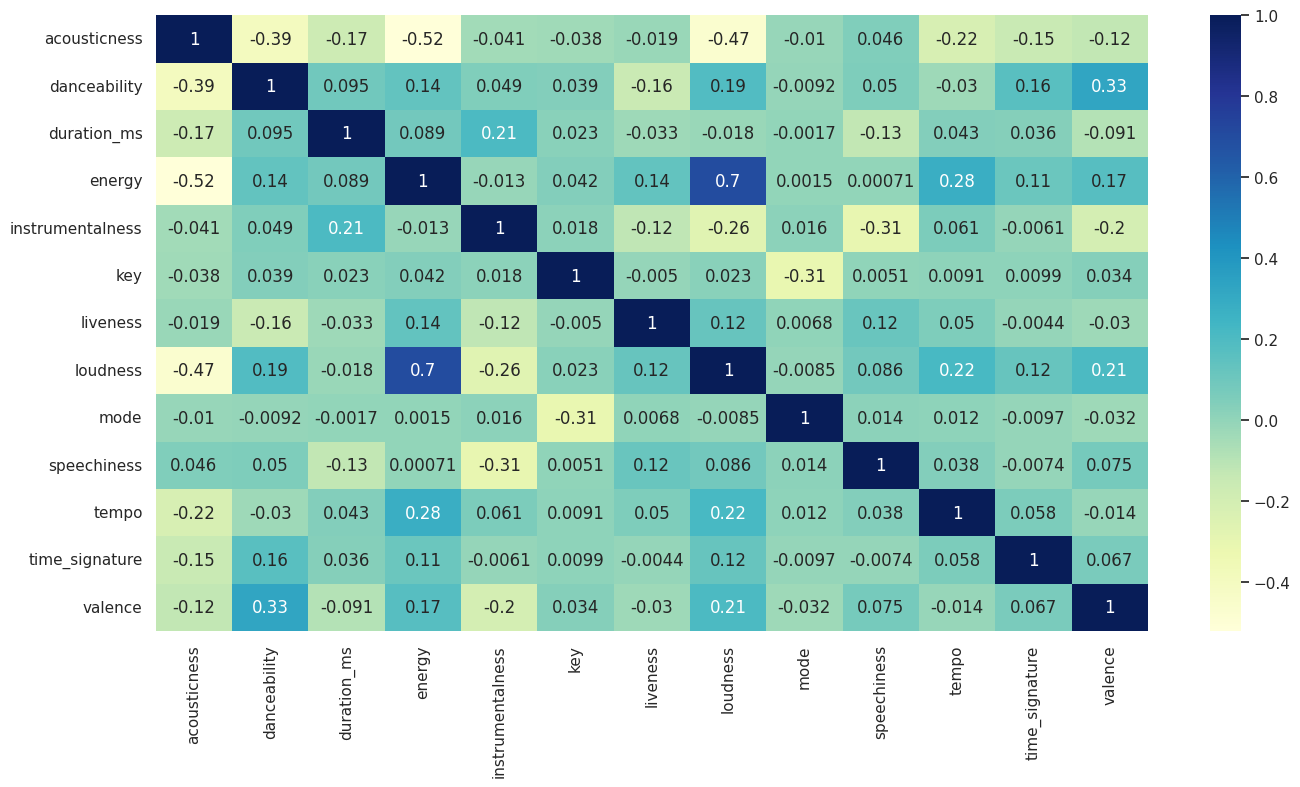

In [145]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

**Creating and scaling datasets**

In [146]:
scale = StandardScaler()
df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)

In [147]:
y = df_sc['danceability'] # The aim is to predict the danceability of a song.
X = df_sc.drop('danceability', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000], test_size=0.4, random_state=random_state) # Splitting as 60% train test, 40% test set.

# **Regression with SVR**

In [150]:
SVM_regression = SVR(C=10, kernel='linear')
SVM_regression.fit(X_train, y_train) # training the model.

SVR(C=10, kernel='linear')

In [151]:
y_pred = SVM_regression.predict(X_test) # Predicting values

In [152]:
predictions = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}) # Creating a dataframe with real values and predictions side by side
# predictions.head()

,y_test,y_pred
8034,0.786228,0.512016
7122,0.735388,0.338124
7571,-0.179736,0.103857
7347,0.837069,0.736910
3246,-0.402162,-0.024362


**Evaluating the model**

In [154]:
MSE_test = round(np.mean(np.square(y_test- y_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
print(RMSE_test, SVM_regression.score(X_test, y_test))

0.75 0.20891826557607085


Results were: 1000 samples: 0.66
17k 0.64
Therefore with the increasing amount of samples, the mean squared error is decreasing

# **Finding optimal model with Grid Search**

In [ ]:
param_grid = {'C': [1,10,100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'degree' : [3,5,9]}

In [ ]:
grid = GridSearchCV(estimator=SVR(),param_grid= param_grid, refit = True, verbose=3, cv=2)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

{'C': 1, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_.score(X_train, y_train)

0.5699168738669884

In [ ]:
y_pred_best = grid.predict(X_test)

In [ ]:
predictions['y_pred_best'] = y_pred_best # Adding best predictions to the dataframe of previous predictions
predictions.head()

NameError: ignored

# **Optimal Model**

In [131]:
optimal = SVR(C=1, gamma = 0.1, kernel = 'rbf')

In [ ]:
optimal.fit(X_train, y_train)

SVR(C=1, gamma=0.1)

In [ ]:
y_optimal = optimal.predict(X_test)

In [ ]:
MSE_opt = round(np.mean(np.square(y_test - y_optimal)),2)
RMSE_opt = round(np.sqrt(MSE_opt),2)
RMSE_opt

0.66

In [ ]:
plt.plot(X_train['valence'], y_train, 'o')
m, b = np.polyfit(X_train['valence'], y_train, 1)
plt.plot(X_train['valence'], m*X_train['valence']+b)

# **Dimensionality Reduction via Feature Selection**


In [132]:
y_pruned = df_sc['danceability']
#df_sc_pruned = df_sc.drop('danceability', axis=1)
#df_sc_pruned  = df_sc_pruned .drop('tempo', axis=1)
#df_sc_pruned  = df_sc_pruned .drop('key', axis=1)
X_pruned = df_sc.drop(['mode', 'key', 'tempo'], axis=1)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_pruned[:100000], y[:100000], test_size=0.4, random_state=random_state)

In [134]:
X_train.shape

(60000, 10)

In [135]:
optimal.fit(X_train, y_train)

SVR(C=1, gamma=0.1)

In [136]:
y_optimal = optimal.predict(X_test)

In [137]:
MSE_opt = round(np.mean(np.square(y_test - y_optimal)),2)
RMSE_opt = round(np.sqrt(MSE_opt),2)
RMSE_opt

0.0

In [125]:
optimal.score(X_test, y_test)

0.9959906000032698